# AI & ML Internship — Task 2
## Data Cleaning & Missing Value Handling

### Objective:
- Identify missing values
- Visualize missing data patterns
- Apply appropriate imputation techniques
- Remove highly missing columns
- Validate dataset quality after cleaning


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display all columns
pd.set_option("display.max_columns", None)


In [4]:
# Load House Prices dataset
house = pd.read_csv("train (1).csv")

# Load Medical Appointment dataset
medical = pd.read_csv("KaggleV2-May-2016.csv")

print("House Prices Shape:", house.shape)
print("Medical Appointments Shape:", medical.shape)


House Prices Shape: (1460, 81)
Medical Appointments Shape: (110527, 14)


In [5]:
# Missing values count (House Prices)
house_missing = house.isnull().sum().sort_values(ascending=False)
house_missing[house_missing > 0]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [6]:
# Missing values count (Medical Appointments)
medical_missing = medical.isnull().sum().sort_values(ascending=False)
medical_missing[medical_missing > 0]


Series([], dtype: int64)

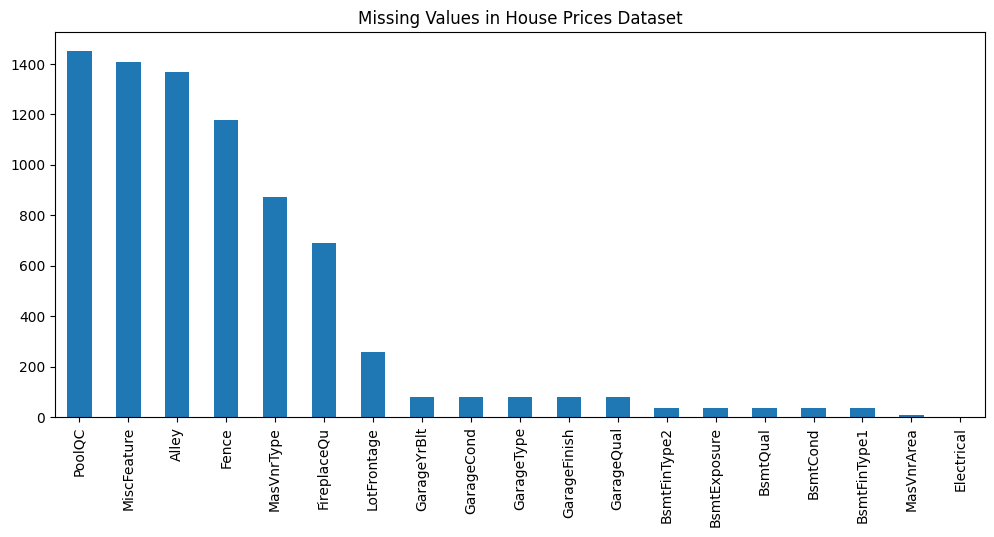

In [7]:
# Plot missing values for House Prices
house_missing[house_missing > 0].plot(
    kind="bar",
    figsize=(12,5),
    title="Missing Values in House Prices Dataset"
)
plt.show()


In [9]:
# Plot missing values for Medical dataset (safe check)
medical_missing_nonzero = medical_missing[medical_missing > 0]

if medical_missing_nonzero.empty:
    print("No missing values found in Medical Appointment dataset.")
else:
    medical_missing_nonzero.plot(
        kind="bar",
        figsize=(8,4),
        title="Missing Values in Medical Appointment Dataset"
    )
    plt.show()


No missing values found in Medical Appointment dataset.


In [10]:
# Function to classify columns
def split_columns(df):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = df.select_dtypes(include=["object"]).columns
    return num_cols, cat_cols

house_num, house_cat = split_columns(house)
medical_num, medical_cat = split_columns(medical)

print("House Numerical:", len(house_num))
print("House Categorical:", len(house_cat))


House Numerical: 38
House Categorical: 43


In [11]:
# Drop columns with more than 40% missing values
threshold = 0.4

house = house.loc[:, house.isnull().mean() < threshold]

print("House dataset shape after dropping columns:", house.shape)


House dataset shape after dropping columns: (1460, 75)


In [13]:
# Median imputation for numerical columns (safe & future-proof)
for col in house_num:
    if col in house.columns:
        house[col] = house[col].fillna(house[col].median())

for col in medical_num:
    medical[col] = medical[col].fillna(medical[col].median())


In [15]:
# Apply mode imputation for categorical columns
for col in house_cat:
    if col in house.columns:
        house[col]=house[col].fillna(house[col].mode()[0])

for col in medical_cat:
    medical[col]=medical[col].fillna(medical[col].mode()[0])


In [16]:
print("House missing values after cleaning:")
house.isnull().sum().sum()


House missing values after cleaning:


0

In [17]:
print("Medical missing values after cleaning:")
medical.isnull().sum().sum()


Medical missing values after cleaning:


0

In [18]:
comparison = pd.DataFrame({
    "Before Cleaning": [pd.read_csv("train.csv").shape[1]],
    "After Cleaning": [house.shape[1]]
}, index=["House Prices"])

comparison


,Before Cleaning,After Cleaning
House Prices,12,75


In [19]:
# Save cleaned datasets
house.to_csv("house_prices_cleaned.csv", index=False)
medical.to_csv("medical_appointments_cleaned.csv", index=False)

print("Cleaned datasets saved successfully.")


Cleaned datasets saved successfully.


### Observations

- Missing values were identified and visualized.
- Columns with very high missing values were removed.
- Median imputation was used for numerical features.
- Mode imputation was used for categorical features.
- Dataset quality improved and is now suitable for ML modeling.
